In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Loading Data Set

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Calories/RAW_recipes.csv")

In [ ]:
df.shape

(83782, 12)

In [ ]:
df.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')

In [ ]:
df['steps'][0]

"['heat the oven to 350f and arrange the rack in the middle', 'line an 8-by-8-inch glass baking dish with aluminum foil', 'combine chocolate and butter in a medium saucepan and cook over medium-low heat , stirring frequently , until evenly melted', 'remove from heat and let cool to room temperature', 'combine eggs , sugar , cocoa powder , vanilla extract , espresso , and salt in a large bowl and briefly stir until just evenly incorporated', 'add cooled chocolate and mix until uniform in color', 'add flour and stir until just incorporated', 'transfer batter to the prepared baking dish', 'bake until a tester inserted in the center of the brownies comes out clean , about 25 to 30 minutes', 'remove from the oven and cool completely before cutting']"

In [ ]:
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,['heat the oven to 350f and arrange the rack i...,"these are the most; chocolatey, moist, rich, d...","['bittersweet chocolate', 'unsalted butter', '...",9
1,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,"['white sugar', 'brown sugar', 'salt', 'margar...",11
2,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,"['frozen broccoli cuts', 'cream of chicken sou...",9
3,millionaire pound cake,286009,120,461724,2008-02-12,"['time-to-make', 'course', 'cuisine', 'prepara...","[878.3, 63.0, 326.0, 13.0, 20.0, 123.0, 39.0]",7,"['freheat the oven to 300 degrees', 'grease a ...",why a millionaire pound cake? because it's su...,"['butter', 'sugar', 'eggs', 'all-purpose flour...",7
4,2000 meatloaf,475785,90,2202916,2012-03-06,"['time-to-make', 'course', 'main-ingredient', ...","[267.0, 30.0, 12.0, 12.0, 29.0, 48.0, 2.0]",17,"['pan fry bacon , and set aside on a paper tow...","ready, set, cook! special edition contest entr...","['meatloaf mixture', 'unsmoked bacon', 'goat c...",13


In [ ]:
df['tags'][0]

"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'for-large-groups', 'desserts', 'lunch', 'snacks', 'cookies-and-brownies', 'chocolate', 'bar-cookies', 'brownies', 'number-of-servings']"

In [ ]:
df['ingredients'][0]

"['bittersweet chocolate', 'unsalted butter', 'eggs', 'granulated sugar', 'unsweetened cocoa powder', 'vanilla extract', 'brewed espresso', 'kosher salt', 'all-purpose flour']"

#Classify into Meal Type


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83782 entries, 0 to 83781
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            83781 non-null  object
 1   id              83782 non-null  int64 
 2   minutes         83782 non-null  int64 
 3   contributor_id  83782 non-null  int64 
 4   submitted       83782 non-null  object
 5   tags            83782 non-null  object
 6   nutrition       83782 non-null  object
 7   n_steps         83782 non-null  int64 
 8   steps           83782 non-null  object
 9   description     83712 non-null  object
 10  ingredients     83782 non-null  object
 11  n_ingredients   83782 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 7.7+ MB


In [ ]:
df.dropna(subset=['name','description'], inplace=True)

In [ ]:
df.isnull().sum()

,0
name,1
id,0
minutes,0
contributor_id,0
submitted,0
tags,0
nutrition,0
n_steps,0
steps,0
description,70


In [ ]:
def robust_meal_classifier(row):
    name = row['name'].lower()
    description = row['description'].lower() if isinstance(row['description'], str) else ""
    ingredients = eval(row['ingredients']) if isinstance(row['ingredients'], str) else []
    ingredients_str = " ".join(ingredients).lower()
    tags = eval(row['tags']) if isinstance(row['tags'], str) else []
    tags_lower = [tag.lower() for tag in tags]
    if 'smoothie' in name or 'smoothie' in tags_lower:
        return 'smoothie'
    elif any(tag in tags_lower for tag in ['snack', 'appetizer', 'finger food']):
        return 'snack'
    elif any(tag in tags_lower for tag in ['breakfast', 'brunch']):
        return 'breakfast'
    elif 'lunch' in tags_lower or 'lunch' in name:
        return 'lunch'
    elif any(tag in tags_lower for tag in ['dinner', 'entree', 'main-dish']):
        return 'dinner'
    if any(k in ingredients_str for k in ['eggs', 'oats', 'cereal', 'pancake', 'toast', 'milk', 'yogurt']) or 'breakfast' in description:
        return 'breakfast'
    elif any(k in ingredients_str for k in ['sandwich', 'wrap', 'rice', 'salad', 'pasta']) or 'lunch' in description:
        return 'lunch'
    elif any(k in ingredients_str for k in ['chicken', 'beef', 'roast', 'stew', 'lasagna']) or 'dinner' in description:
        return 'dinner'
    elif any(k in ingredients_str for k in ['chips', 'nuts', 'bars', 'dips', 'cookies']) or 'snack' in description:
        return 'snack'
    elif any(k in ingredients_str for k in ['banana', 'berries', 'yogurt', 'milk', 'protein powder']) or 'smoothie' in description:
        return 'smoothie'
    return 'other'
df['meal_type'] = df.apply(robust_meal_classifier, axis=1)
print(df['meal_type'].value_counts())


meal_type
dinner       27288
breakfast    24897
other        18622
lunch         8876
snack         2053
smoothie      1975
Name: count, dtype: int64


#Dividing to the non-veg,veg,vegan

In [ ]:
def classify_diet_type(row):
    try:
        tags = eval(row['tags']) if isinstance(row['tags'], str) else row['tags']
        tags = tags if isinstance(tags, list) else []
    except:
        tags = []

    try:
        ingredients = eval(row['ingredients']) if isinstance(row['ingredients'], str) else row['ingredients']
        ingredients = ingredients if isinstance(ingredients, list) else []
    except:
        ingredients = []

    tags_lower = [str(tag).lower() for tag in tags]
    ingredients_str = " ".join(map(str, ingredients)).lower()
    if 'vegan' in tags_lower:
        return 'vegan'
    elif 'vegetarian' in tags_lower:
        return 'veg'
    elif any(tag in tags_lower for tag in ['meat', 'poultry', 'fish', 'chicken', 'beef', 'pork']):
        return 'non_veg'
    non_veg_keywords = ['chicken', 'beef', 'pork', 'fish', 'bacon', 'ham', 'shrimp', 'lamb', 'sausage']
    vegan_blacklist = ['milk', 'cheese', 'butter', 'egg', 'cream', 'yogurt', 'honey']

    if any(item in ingredients_str for item in non_veg_keywords):
        return 'non_veg'
    elif any(item in ingredients_str for item in vegan_blacklist):
        return 'veg'
    else:
        return 'vegan'


In [ ]:
df['diet_type'] = df.apply(classify_diet_type, axis=1)

In [ ]:
df['diet_type'].value_counts()

,count
diet_type,
veg,37286
non_veg,33334
vegan,13091


<Figure size 1200x600 with 0 Axes>

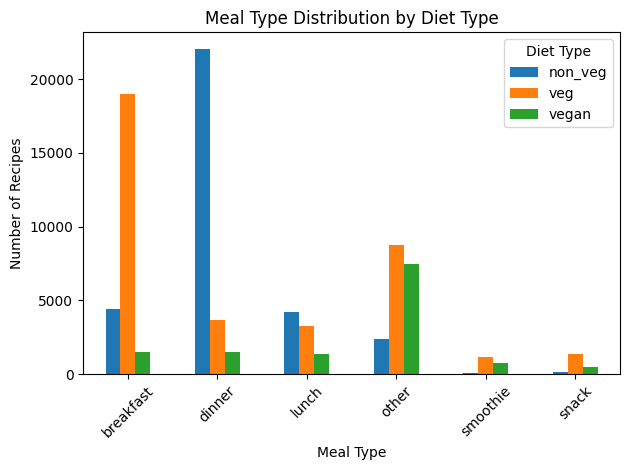

In [ ]:
meal_diet_counts = df.groupby(['meal_type', 'diet_type']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
meal_diet_counts.plot(kind='bar', stacked=False)
plt.title('Meal Type Distribution by Diet Type')
plt.xlabel('Meal Type')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45)
plt.legend(title='Diet Type')
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients', 'meal_type', 'diet_type'],
      dtype='object')

In [ ]:
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,meal_type,diet_type
0,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,['heat the oven to 350f and arrange the rack i...,"these are the most; chocolatey, moist, rich, d...","['bittersweet chocolate', 'unsalted butter', '...",9,lunch,veg
1,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,"['white sugar', 'brown sugar', 'salt', 'margar...",11,breakfast,veg
2,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,"['frozen broccoli cuts', 'cream of chicken sou...",9,breakfast,non_veg
3,millionaire pound cake,286009,120,461724,2008-02-12,"['time-to-make', 'course', 'cuisine', 'prepara...","[878.3, 63.0, 326.0, 13.0, 20.0, 123.0, 39.0]",7,"['freheat the oven to 300 degrees', 'grease a ...",why a millionaire pound cake? because it's su...,"['butter', 'sugar', 'eggs', 'all-purpose flour...",7,breakfast,veg
4,2000 meatloaf,475785,90,2202916,2012-03-06,"['time-to-make', 'course', 'main-ingredient', ...","[267.0, 30.0, 12.0, 12.0, 29.0, 48.0, 2.0]",17,"['pan fry bacon , and set aside on a paper tow...","ready, set, cook! special edition contest entr...","['meatloaf mixture', 'unsmoked bacon', 'goat c...",13,dinner,non_veg


In [ ]:
df['nutrition'][0]

'[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]'

##We are converting the steps into the List Formating

In [ ]:
import ast

def parse_steps_safe(x):
    if isinstance(x, list):
        return x
    elif isinstance(x, str):
        try:
            parsed = ast.literal_eval(x)
            if isinstance(parsed, list):
                return parsed
            else:
                return [str(parsed)]
        except (ValueError, SyntaxError):
            return [x.strip()]
    else:
        return ["No steps available"]
df['steps'] = df['steps'].apply(parse_steps_safe)


###Splitting the Nutrition columsn to multiple columns

In [ ]:
nutrition_cols = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']
df[nutrition_cols] = pd.DataFrame(df['nutrition'].apply(eval).tolist(), index=df.index)

#Saving the Processed Dataframe into the Drive

In [ ]:
df.to_csv("/content/drive/MyDrive/Calories/Recipes.csv")

In [ ]:
da.drop(:)

In [ ]:
da=pd.read_csv("/content/drive/MyDrive/Calories/Recipes.csv")

In [ ]:
da.columns

Index(['Unnamed: 0', 'name', 'id', 'minutes', 'contributor_id', 'submitted',
       'tags', 'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients', 'meal_type', 'diet_type', 'calories', 'total_fat',
       'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates'],
      dtype='object')

#Stream lit

In [ ]:
!pip install langchain openai faiss-cpu pymupdf tiktoken --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 50.1 MB/s eta 0:00:00


In [ ]:
!pip install -U langchain langchain-community faiss-cpu openai pymupdf tiktoken


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.8/810.8 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.100.0
    Uninstalling openai-1.100.0:
      Successfully uninstalled openai-1.100.0


In [ ]:
pip install openai

In [ ]:
!rm -rf /root/.ngrok2


In [ ]:
!pip install pyngrok

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.5 MB/s eta 0:00:00


In [ ]:
!ngrok config add-authtoken 2a475kJZ2vlVv0atZBkbCmIyxk0_766D77csdRJKkoatBa3Wv


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:

!pip install langchain openai faiss-cpu pymupdf tiktoken --quiet

In [ ]:
!pip install -U langchain langchain-community faiss-cpu openai pymupdf tiktoken


In [ ]:
!pip install fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=c727ca184b0194d6694763008fc6d5e9c8ffbdf7aa2044b96832b5af2d8d5153
  Stored in directory: /root/.cache/pip/wheels/6e/62/11/dc73d78e40a218ad52e7451f30166e94491be013a7850b5d75
Successfully built fpdf


In [ ]:
import os
from google.colab import userdata
os.environ["OPENAI_API_KEY"] = userdata.get("open_ai")

In [ ]:
import os
os.system("pkill streamlit")
os.system("pkill ngrok")

0

In [ ]:
!pip install streamlit pyngrok -q


In [ ]:
import threading
import os
import time
from pyngrok import ngrok


!pkill streamlit > /dev/null 2>&1
ngrok.kill()


def run():
    os.system("streamlit run /content/Stream_lit_Chat.py --server.headless true")

thread = threading.Thread(target=run)
thread.start()
time.sleep(5)

public_url = ngrok.connect(8501)
print("Streamlit app is live at:", public_url)


Streamlit app is live at: NgrokTunnel: "https://7a9ccea8558a.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
ngrok.kill()

#Creatign the Vector Data Base

In [ ]:
!pip install langchain openai faiss-cpu pymupdf tiktoken --quiet


In [ ]:
!pip install -U langchain langchain-community faiss-cpu openai pymupdf tiktoken


In [ ]:
pip install unstructured

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 8.4 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=42d3e1100b870876b199f135a5cec6211eefa69f5fbd33916340c93bd6b58623
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:
!pip install python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 4.4 MB/s eta 0:00:00


#Loading all the 5 type of files into the Vector Database

In [ ]:
pip install -U langchain-openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 1.9 MB/s eta 0:00:00


In [ ]:
from langchain_openai import OpenAIEmbeddings


In [ ]:

import os
from config import OpenAIConfig

config = OpenAIConfig()

from langchain_community.document_loaders import (
    PyMuPDFLoader, UnstructuredWordDocumentLoader,
    TextLoader, CSVLoader, UnstructuredHTMLLoader
)
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS


os.environ["OPENAI_API_KEY"] = config.get_api_key()


pdf_path_1 = "/content/drive/MyDrive/Calories/All_5_files/Human Nutrition, University of Hawai‘i at Mānoa Food Science and Human Nutrition Program.pdf"
pdf_path_2 = "/content/drive/MyDrive/Calories/All_5_files/Nutrition Science and Everyday Application, Alice Callahan, Heather Leonard, Med, Tamberly Powell.pdf"


docs = []

if os.path.exists(pdf_path_1):
    loaded = PyMuPDFLoader(pdf_path_1).load()
    for doc in loaded:
        doc.metadata["source"] = "diet_p1"
    docs.extend(loaded)

if os.path.exists(pdf_path_2):
    loaded = PyMuPDFLoader(pdf_path_2).load()
    for doc in loaded:
        doc.metadata["source"] = "dier_p2"
    docs.extend(loaded)


splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
chunks = splitter.split_documents(docs)

embedding_model = OpenAIEmbeddings()
vectorstore = FAISS.from_documents(chunks, embedding_model)

faiss_path = "/content/drive/MyDrive/test_vecgtor"
os.makedirs(faiss_path, exist_ok=True)
vectorstore.save_local(faiss_path)

print(f"Vectorstore saved at: {faiss_path}")


Vectorstore saved at: /content/drive/MyDrive/test_vecgtor


In [ ]:

import os
from config import OpenAIConfig

config = OpenAIConfig()

from langchain_community.document_loaders import (
    PyMuPDFLoader, UnstructuredWordDocumentLoader,
    TextLoader, CSVLoader, UnstructuredHTMLLoader
)
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS


os.environ["OPENAI_API_KEY"] = config.get_api_key()


pdf_path = "/content/drive/MyDrive/Calories/All_5_files/Dietary_Guidelines_for_Americans_2020-2025.pdf"
docx_path = "/content/drive/MyDrive/Calories/All_5_files/Physical_Activity_Guidelines_2nd_edition.docx"
txt_path = "/content/drive/MyDrive/Calories/All_5_files/Weight Myths.txt"
csv_path = "/content/drive/MyDrive/Calories/All_5_files/GymDataset.csv"
html_gain_path = "/content/drive/MyDrive/Calories/All_5_files/11 Tips To Build Muscle.html"
html_loss_path = "/content/drive/MyDrive/Calories/All_5_files/The Science of Weight Loss.html"
pdf_path_1 = "/content/drive/MyDrive/Calories/All_5_files/Human Nutrition, University of Hawai‘i at Mānoa Food Science and Human Nutrition Program.pdf"
pdf_path_2 = "/content/drive/MyDrive/Calories/All_5_files/Nutrition Science and Everyday Application, Alice Callahan, Heather Leonard, Med, Tamberly Powell.pdf"

docs = []

if os.path.exists(pdf_path):
    loaded = PyMuPDFLoader(pdf_path).load()
    for doc in loaded:
        doc.metadata["source"] = "diet"
    docs.extend(loaded)

if os.path.exists(docx_path):
    loaded = UnstructuredWordDocumentLoader(docx_path).load()
    for doc in loaded:
        doc.metadata["source"] = "physical"
    docs.extend(loaded)

if os.path.exists(txt_path):
    loaded = TextLoader(txt_path).load()
    for doc in loaded:
        doc.metadata["source"] = "Weight"
    docs.extend(loaded)

if os.path.exists(csv_path):
    loaded = CSVLoader(csv_path).load()
    for doc in loaded:
        doc.metadata["source"] = "GymDataset"
    docs.extend(loaded)

if os.path.exists(html_gain_path):
    loaded = UnstructuredHTMLLoader(html_gain_path).load()
    for doc in loaded:
        doc.metadata["source"] = "weight_gain"
    docs.extend(loaded)

if os.path.exists(html_loss_path):
    loaded = UnstructuredHTMLLoader(html_loss_path).load()
    for doc in loaded:
        doc.metadata["source"] = "weight_loss"
    docs.extend(loaded)
if os.path.exists(pdf_path_1):
    loaded = PyMuPDFLoader(pdf_path_1).load()
    for doc in loaded:
        doc.metadata["source"] = "Human_Nut"
    docs.extend(loaded)

if os.path.exists(pdf_path_2):
    loaded = PyMuPDFLoader(pdf_path_2).load()
    for doc in loaded:
        doc.metadata["source"] = "Nut_Science"
    docs.extend(loaded)

splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
chunks = splitter.split_documents(docs)

embedding_model = OpenAIEmbeddings()
vectorstore = FAISS.from_documents(chunks, embedding_model)

faiss_path = "/content/drive/MyDrive/vector"
os.makedirs(faiss_path, exist_ok=True)
vectorstore.save_local(faiss_path)

print(f"Vectorstore saved at: {faiss_path}")


Vectorstore saved at: /content/drive/MyDrive/vector


In [ ]:
def ask_query_with_context(query: str, faiss_path: str, model_name: str = "gpt-3.5-turbo"):
    from langchain.vectorstores import FAISS
    from langchain.embeddings import OpenAIEmbeddings
    from langchain.chat_models import ChatOpenAI
    from langchain.chains.qa_with_sources import load_qa_with_sources_chain


    embeddings = OpenAIEmbeddings()
    vectorstore = FAISS.load_local(faiss_path, embeddings, allow_dangerous_deserialization=True)


    retriever = vectorstore.as_retriever(search_kwargs={"k": 5})
    relevant_docs = retriever.get_relevant_documents(query)

    context_text = "\n\n".join([doc.page_content for doc in relevant_docs])
    prompt = f"""Answer the following question using only the context below.

Context:
{context_text}

Question: {query}
Answer:"""


    llm = ChatOpenAI(model=model_name, temperature=0)
    chain = load_qa_with_sources_chain(llm, chain_type="stuff")

    result = chain(
        {"question": query, "input_documents": relevant_docs},
        return_only_outputs=True
    )


    print("Returned keys from chain:", result.keys())

    return {
        "prompt": prompt,
        "response": result.get("output_text", "No response available."),
        "context_chunks": [doc.page_content for doc in relevant_docs]
    }


In [ ]:
faiss_path = "/content/drive/MyDrive/vector"
query = "What are the dietary guidelines for protein intake?"

output = ask_query_with_context(query, faiss_path)

print("\n Prompt:\n", output["prompt"])
print("\n GPT Response:\n", output["response"])
print("\nContext Chunks:")
for i, chunk in enumerate(output["context_chunks"], 1):
    print(f"\nChunk {i}:\n{chunk}")


Returned keys from chain: dict_keys(['output_text'])

 Prompt:
 Answer the following question using only the context below.

Context:
https://openoregon.pressbooks.pub/nutritionscience2e/?p=315#h5p-41 
Attributions: 
• Lindshield, B. L. Kansas State University Human Nutrition (FNDH 400) Flexbook. goo.gl/
vOAnR, CC BY-NC-SA 4.0 
• “Diseases Involving Proteins”, section 6.5 from the book An Introduction to Nutrition (v. 1.0), 
CC BY-NC-SA 3.0 
References: 
• 1Food and Nutrition Board, & Institute of Medicine. (2005). Dietary Reference Intakes for 
Energy, Carbohydrate, Fiber, Fat, Fatty Acids, Cholesterol, Protein, and Amino Acids (p. 1359). 
Washington, D.C.: The National Academies Press. 
• 2Berryman, C. E., Lieberman, H. R., Fulgoni, V. L., & Pasiakos, S. M. (2018). Protein intake 
trends and conformity with the Dietary Reference Intakes in the United States: Analysis of 
the National Health and Nutrition Examination Survey, 2001-2014. The American Journal of 
Clinical Nutrition, 108(